In [56]:
from sklearn.cluster import KMeans
import pandas as pd
import pickle
import string
import re
import string
from sklearn.model_selection import cross_validate as cross_validation, ShuffleSplit, cross_val_score, train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.svm import *
# from sklearn.tree import *
from sklearn.neural_network import *
from sklearn.linear_model import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import *
from sklearn.impute import IterativeImputer
from sklearn.naive_bayes import *
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [57]:
data = pd.read_pickle('imputed_data_forest_2.pkl')


In [58]:
data.head()

,YEAR,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,HHsizeMAE,LandOwned,LandCultivated,LivestockHoldings,...,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,2019.0,1.0,11.19,-0.95,254.0,7.0,5.56,10.000,2.0,1.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019.0,1.0,11.19,-0.95,346.0,10.0,8.02,6.940,1.2,4.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019.0,1.0,11.19,-0.99,324.0,6.0,4.69,2.000,0.8,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019.0,1.0,11.19,-0.99,326.0,6.0,4.46,6.532,0.8,5.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019.0,1.0,11.22,-1.02,308.0,8.0,6.52,10.000,4.0,2.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# data = scaler.fit_transform(data)

In [60]:
X = data.drop(['Food_InsecurityLevel','YEAR','currency_conversion_factor'],axis=1)
y = data['Food_InsecurityLevel']
y.unique()

array([3, 4, 2, 1], dtype=int32)

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [62]:
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import KernelPCA
transformer = SelectFromModel(estimator=RandomForestRegressor()).fit(X, y)
X_new = transformer.transform(X)
X_new.shape


(35726, 22)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y, test_size=0.25, random_state=0)

In [ ]:
print(ExtraTreesClassifier().__class__.__name__)

In [63]:
def basic_classifier_tester(classifiers, X, y):
    test_scores = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    for classifier in (classifiers):
        classifier.fit(X_train, y_train)
        score = classifier.score(X_test, y_test)
        test_scores[classifier.__class__.__name__] = score
        print(classifier.__class__.__name__ + ":")
        print(score)
    return test_scores    

In [64]:
# def add_scaler()

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
classifiers = []
classifiers.append(ExtraTreesClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(BaggingClassifier())
classifiers.append(AdaBoostClassifier())
classifiers.append(RidgeClassifierCV())
classifiers.append(SGDClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(SVC())
classifiers.append(LinearSVC())
classifiers.append(SVC(kernel="poly"))
classifiers.append(MLPClassifier())
classifiers.append(GaussianNB())
classifiers.append(LogisticRegression(solver='liblinear'))
classifiers.append(LDA())



In [66]:
basic_classifier_scores = basic_classifier_tester(classifiers, X, y)

ExtraTreesClassifier:
0.6931258396775638
RandomForestClassifier:
0.6961486789072996
DecisionTreeClassifier:
0.6004254366323332
BaggingClassifier:
0.677115987460815
AdaBoostClassifier:
0.5807210031347962
RidgeClassifierCV:
0.5618002686968204
SGDClassifier:
0.5462382445141066
KNeighborsClassifier:
0.5859829825347067
GradientBoostingClassifier:
0.6530452306314375
SVC:
0.6276309896999552
LinearSVC:
0.5666144200626959
SVC:
0.6362516793551276


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier:
0.6538289296909987
GaussianNB:
0.36710703090013436
LogisticRegression:
0.5700850873264667
LinearDiscriminantAnalysis:
0.566166592028661


In [67]:
basic_classifier_scores_after_fs = basic_classifier_tester(classifiers, X_new, y)

ExtraTreesClassifier:
0.6698387819077474
RandomForestClassifier:
0.6865203761755486
DecisionTreeClassifier:
0.5876623376623377
BaggingClassifier:
0.6614420062695925
AdaBoostClassifier:
0.5662785490371697
RidgeClassifierCV:
0.5066054635020152
SGDClassifier:
0.4680922525750112
KNeighborsClassifier:
0.5573219883564711
GradientBoostingClassifier:
0.6365875503806538
SVC:
0.5789296909986565
LinearSVC:
0.509628302731751
SVC:
0.5776981639050605


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier:
0.5879982086878639
GaussianNB:
0.28929690998656515
LogisticRegression:
0.5206000895656068
LinearDiscriminantAnalysis:
0.5225033587102552


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<Figure size 2880x576 with 0 Axes>

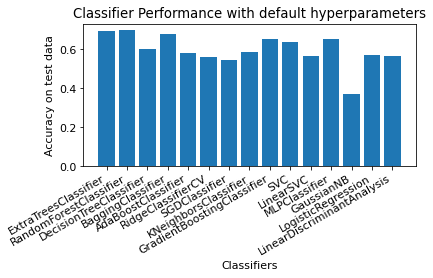

In [68]:
keys = basic_classifier_scores.keys()
values = basic_classifier_scores.values()

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 11}

# def insert_linebreak(string, lengLabel=48):
    

# keys_new = []
# for s in keys:
#     keys_new.append(insert_linebreak(string))
    
plt.rc('font', **font)
plt.figure(figsize=(40, 8))  # width:20, height:3
fig, ax = plt.subplots()
plt.bar(keys, values)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.title('Classifier Performance with default hyperparameters')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy on test data')
fig.tight_layout()
plt.savefig('comparison.png', dpi=200, pad_inches=4) 

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import f_classif
# X_new = SelectKBest(f_classif, k=).fit_transform(X, y)

In [ ]:
# from matplotlib import pyplot
# data.hist()
# pyplot.show()

In [8]:
classifier = MLPClassifier(alpha= 0.0001, hidden_layer_sizes= (40, 100), max_iter= 500)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

In [9]:
print(score)

0.6343484102104792


In [ ]:
clf1 = MLPClassifier(hidden_layer_sizes =(100,100))
# clf1.fit(X_train, y_train)
# clf1.score(X_test, y_test)
clf2 = RandomForestClassifier(bootstrap=False, n_estimators=500)
# clf2.fit(X_train, y_train)
clf3 = GradientBoostingClassifier( n_estimators=500)
# clf3.fit(X_train, y_train)
clf4 = SVC()
# clf4.fit(X_train, y_train)
clf5 = KNeighborsClassifier()
# clf5.fit(X_train, y_train)
# clf5 = DecisionTreeClassifier()
# clf5.fit(X_train, y_train)

In [ ]:
clf3 = GradientBoostingClassifier( n_estimators=500)
clf3.fit(X_train, y_train)

In [ ]:
# {'bootstrap': False,
#  'max_depth': 50,
#  'max_features': 'auto',
#  'min_samples_leaf': 1,
#  'n_estimators': 500}
from sklearn.ensemble import *
clf1 = ExtraTreesClassifier(bootstrap= False, max_depth= 50,max_features ='auto', min_samples_leaf= 1, n_estimators= 500)
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

In [ ]:
vclf = VotingClassifier(estimators=[('a', clf1), ('b', clf2),('c',clf3), ('d', clf4),('e',clf5)], voting='hard')
vclf.fit(X_train, y_train)
vclf.score(X_test, y_test)

In [ ]:
vclf.score(X_test, y_test)

In [ ]:
sclf = StackingClassifier(
     estimators=[
          ('1', clf1), ('2', clf2),('3',clf3), ('4', clf4),('5',clf5)], final_estimator=DecisionTreeClassifier())
sclf.fit(X_train, y_train)
sclf.score(X_test, y_test)